In [93]:
import pandas as pd
import pydoc as doc
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [108]:
df = pd.read_csv("AJ_QControl_Thionine_stats_SY.txt", sep="\t")


In [123]:
df


,ID,Structure,Status,Total,059-CKT-1-Thionine-12-07-15-08-04.png,071-CKT-1-Thionine-12-07-15-08-05.png,083-CKT-1-Thionine-12-07-15-08-06.png,095-CKT-1-Thionine-12-07-15-08-07.png,107-CKT-1-Thionine-12-07-15-08-08.png,119-CKT-1-Thionine-12-07-15-08-09.png,131-CKT-1-Thionine-12-07-15-08-10.png,143-CKT-1-Thionine-12-07-15-08-11.png,155-CKT-1-Thionine-12-07-15-08-12.png,167-CKT-1-Thionine-12-07-15-08-13.png,179-CKT-1-Thionine-12-07-15-08-14.png,191-CKT-1-Thionine-12-07-15-08-15.png,203-CKT-1-Thionine-12-07-15-08-16.png,215-CKT-1-Thionine-12-07-15-08-17.png,227-CKT-1-Thionine-12-07-15-08-18.png
0,NaN,Total,NaN,1183,45.0,58.0,58.0,100.0,90.0,101.0,88.0,108.0,92.0,85.0,87.0,65.0,71.0,75.0,60.0
1,NaN,Total,Accurate,2223,119.0,139.0,148.0,155.0,137.0,147.0,174.0,169.0,169.0,161.0,175.0,171.0,160.0,141.0,58.0
2,NaN,Total,Inaccurate,16,0.0,0.0,2.0,0.0,3.0,4.0,1.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0
3,NaN,Total,Uncertain,317,12.0,11.0,13.0,15.0,22.0,33.0,22.0,23.0,21.0,24.0,22.0,19.0,23.0,35.0,22.0
4,NaN,Total,Damaged,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,73.0,ventricular systems,NaN,24,NaN,0.0,1.0,2.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,NaN,NaN,1.0,NaN
391,73.0,ventricular systems,Accurate,10,NaN,1.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,0.0,NaN,NaN,0.0,NaN
392,73.0,ventricular systems,Inaccurate,6,NaN,0.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN
393,73.0,ventricular systems,Uncertain,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN


## Task 1: Calculate percentage accuracy per region

In [44]:
# Accuracy score = No. of accurate markers / (accurate markers + inaccurate markers)
# Uncertainty score = No. of uncertain markers / (accurate markers + inaccurate markers + uncertain markers)

# Use total column as this represents the complete series.

region_accuracy = list(df.iloc[1::5,3])
region_accuracy

[2223,
 8,
 0,
 0,
 0,
 0,
 0,
 845,
 128,
 6,
 0,
 141,
 0,
 39,
 2,
 9,
 0,
 0,
 0,
 78,
 5,
 4,
 6,
 43,
 4,
 1,
 13,
 5,
 12,
 5,
 0,
 0,
 20,
 0,
 180,
 0,
 30,
 0,
 24,
 19,
 17,
 50,
 0,
 0,
 27,
 0,
 14,
 0,
 0,
 0,
 7,
 0,
 13,
 10,
 7,
 4,
 7,
 9,
 1,
 5,
 0,
 34,
 14,
 129,
 3,
 0,
 8,
 2,
 15,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 199,
 10]

In [45]:
region_inaccuracy = list(df.iloc[2::5,3])
region_inaccuracy                    

[16,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 6]

In [46]:
region_id = list(df.iloc[::5,0]) 
#region_id 

# the intention here was to convert every ID to an int. This hasn't worked. I'm not sure why. 
region_id_str = []
for element in region_id:
    if type(element)!=float:
        region_id_str.append(element)
    else:
        region_id_str.append(int(element))
        
region_id_str

#[int(element) for element in region_id]
#region_id_str


#fs = [int(x) for x in fs]
#region = list(df.iloc[2::5,2])

#What is the type of element 2 in the list? 
type(region_id_str[2])

float

In [100]:
np_array = np.array(region_id).astype(int)

In [106]:
df.values[::5,1]

array(['Total', "Ammon's horn", 'Parasubiculum', 'Claustrum', 'Striatum',
       'Striatum-like amygdalar nuclei',
       'Lateral group of the dorsal thalamus',
       'Reticular nucleus of the thalamus', 'Midbrain, motor related',
       'Pons, behavioral state related'], dtype=object)

In [107]:
region_name = list(df.iloc[::5,1]) 
region_name

['Total',
 "Ammon's horn",
 'Parasubiculum',
 'Claustrum',
 'Striatum',
 'Striatum-like amygdalar nuclei',
 'Lateral group of the dorsal thalamus',
 'Reticular nucleus of the thalamus',
 'Midbrain, motor related',
 'Pons, behavioral state related']

In [48]:
compare_lists = zip(region_id, region_name, region_accuracy, region_inaccuracy)
zipped_lists = list(compare_lists)
print(zipped_lists)

[(nan, 'Total', 2223, 16), (0.0, 'Clear Label', 8, 1), (997.0, 'root', 0, 0), (8.0, 'Basic cell groups and regions', 0, 0), (567.0, 'Cerebrum', 0, 0), (688.0, 'Cerebral cortex', 0, 0), (695.0, 'Cortical plate', 0, 0), (315.0, 'Isocortex', 845, 2), (698.0, 'Olfactory areas', 128, 0), (1089.0, 'Hippocampal formation', 6, 0), (1080.0, 'Hippocampal region', 0, 0), (375.0, "Ammon's horn", 141, 1), (726.0, 'Dentate gyrus', 0, 0), (10703.0, 'Dentate gyrus, molecular layer', 39, 0), (10704.0, 'Dentate gyrus, polymorph layer', 2, 0), (632.0, 'Dentate gyrus, granule cell layer', 9, 1), (982.0, 'Fasciola cinerea', 0, 0), (19.0, 'Induseum griseum', 0, 0), (822.0, 'Retrohippocampal region', 0, 0), (909.0, 'Entorhinal area', 78, 0), (843.0, 'Parasubiculum', 5, 0), (1037.0, 'Postsubiculum', 4, 0), (1084.0, 'Presubiculum', 6, 0), (502.0, 'Subiculum', 43, 0), (703.0, 'Cortical subplate', 4, 0), (583.0, 'Claustrum', 1, 0), (942.0, 'Endopiriform nucleus', 13, 0), (131.0, 'Lateral amygdalar nucleus', 5, 0

In [68]:
# remove elements with no markers

new_zipped_list = [(a, b, c, d) for a, b, c, d in zipped_lists if c != 0]
new_zipped_list


[(nan, 'Total', 2223, 16),
 (0.0, 'Clear Label', 8, 1),
 (315.0, 'Isocortex', 845, 2),
 (698.0, 'Olfactory areas', 128, 0),
 (1089.0, 'Hippocampal formation', 6, 0),
 (375.0, "Ammon's horn", 141, 1),
 (10703.0, 'Dentate gyrus, molecular layer', 39, 0),
 (10704.0, 'Dentate gyrus, polymorph layer', 2, 0),
 (632.0, 'Dentate gyrus, granule cell layer', 9, 1),
 (909.0, 'Entorhinal area', 78, 0),
 (843.0, 'Parasubiculum', 5, 0),
 (1037.0, 'Postsubiculum', 4, 0),
 (1084.0, 'Presubiculum', 6, 0),
 (502.0, 'Subiculum', 43, 0),
 (703.0, 'Cortical subplate', 4, 0),
 (583.0, 'Claustrum', 1, 0),
 (942.0, 'Endopiriform nucleus', 13, 0),
 (131.0, 'Lateral amygdalar nucleus', 5, 0),
 (295.0, 'Basolateral amygdalar nucleus', 12, 0),
 (319.0, 'Basomedial amygdalar nucleus', 5, 0),
 (477.0, 'Striatum', 20, 0),
 (672.0, 'Caudoputamen', 180, 0),
 (56.0, 'Nucleus accumbens', 30, 0),
 (754.0, 'Olfactory tubercle', 24, 1),
 (275.0, 'Lateral septal complex', 19, 0),
 (278.0, 'Striatum-like amygdalar nuclei', 1

In [78]:
new_region_name = []
new_region_id = []
accuracy_score = []

for a,b,c,d in new_zipped_list:
    new_region_id.append(a)
    new_region_name.append(b)
    accuracy_score.append(c / (c + d))

compare_new_lists = list(zip(new_region_id, new_region_name, accuracy_score))
compare_new_lists

#accuracy_score = []
#for x,y in zip(region_accuracy, region_inaccuracy):
#        if (x + y)!=0:
#            accuracy_score.append(x / (x + y))
#        else:
#            accuracy_score.append(0)
            
#accuracy_score

[(nan, 'Total', 0.9928539526574364),
 (0.0, 'Clear Label', 0.8888888888888888),
 (315.0, 'Isocortex', 0.9976387249114522),
 (698.0, 'Olfactory areas', 1.0),
 (1089.0, 'Hippocampal formation', 1.0),
 (375.0, "Ammon's horn", 0.9929577464788732),
 (10703.0, 'Dentate gyrus, molecular layer', 1.0),
 (10704.0, 'Dentate gyrus, polymorph layer', 1.0),
 (632.0, 'Dentate gyrus, granule cell layer', 0.9),
 (909.0, 'Entorhinal area', 1.0),
 (843.0, 'Parasubiculum', 1.0),
 (1037.0, 'Postsubiculum', 1.0),
 (1084.0, 'Presubiculum', 1.0),
 (502.0, 'Subiculum', 1.0),
 (703.0, 'Cortical subplate', 1.0),
 (583.0, 'Claustrum', 1.0),
 (942.0, 'Endopiriform nucleus', 1.0),
 (131.0, 'Lateral amygdalar nucleus', 1.0),
 (295.0, 'Basolateral amygdalar nucleus', 1.0),
 (319.0, 'Basomedial amygdalar nucleus', 1.0),
 (477.0, 'Striatum', 1.0),
 (672.0, 'Caudoputamen', 1.0),
 (56.0, 'Nucleus accumbens', 1.0),
 (754.0, 'Olfactory tubercle', 0.96),
 (275.0, 'Lateral septal complex', 1.0),
 (278.0, 'Striatum-like amygd

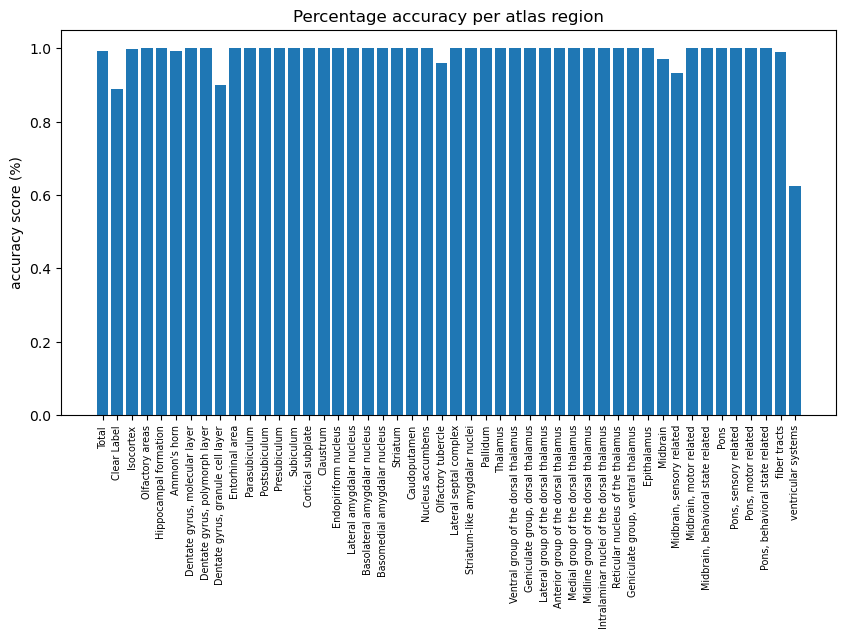

In [83]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(new_region_name, accuracy_score)

ax.set_ylabel('accuracy score (%)')
ax.set_title('Percentage accuracy per atlas region')
plt.xticks(rotation = "vertical",fontsize = "x-small")

plt.savefig("Percentage accuracy per atlas region.svg", bbox_inches = "tight")
plt.show()


In [81]:
# save results to a csv file

import pandas as pd  
     
# list of name, degree, score 
region_id
region_name
accuracy_score
 
# dictionary of lists  
dict = {'Region ID': new_region_id, 'Region': new_region_name, 'Perc accuracy': accuracy_score}  
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('AJ_SY_accuracy_score_new.csv', index=False) # index_False means that it doesn't add an extra column

In [ ]:
# need to remove results with no markers as the accuracy score is not zero for these regions.

In [85]:
df.set_index('Region ID')

,Region,Perc accuracy
Region ID,,
NaN,Total,0.992854
0.0,Clear Label,0.888889
315.0,Isocortex,0.997639
698.0,Olfactory areas,1.000000
1089.0,Hippocampal formation,1.000000
375.0,Ammon's horn,0.992958
10703.0,"Dentate gyrus, molecular layer",1.000000
10704.0,"Dentate gyrus, polymorph layer",1.000000
632.0,"Dentate gyrus, granule cell layer",0.900000
